#  Project Objective
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

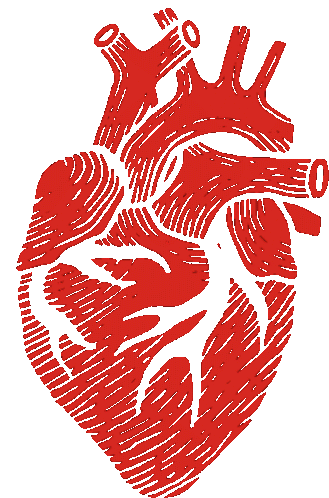

# Step 1: Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!')

All Modules Loaded Successfully!


# Step 2: Loading Data

In [2]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


# Step 3: Understanding Data Using EDA

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###### 3.6 Column Desc
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

In [8]:
# Domain Knowledge is required for this level of project

In [9]:
df.isna().sum()
# No null values found
# in case of null:remove, fill, replace, drop

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# column slot

In [10]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


# Each column univariate analysis

In [11]:
for i in df:
    print(f'Column_{i}',df[i].unique())
    print('==================',end = '\n\n')

Column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

Column_sex [1 0]

Column_cp [3 2 1 0]

Column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

Column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 3

# Each Numarical Features Histplot Distribution

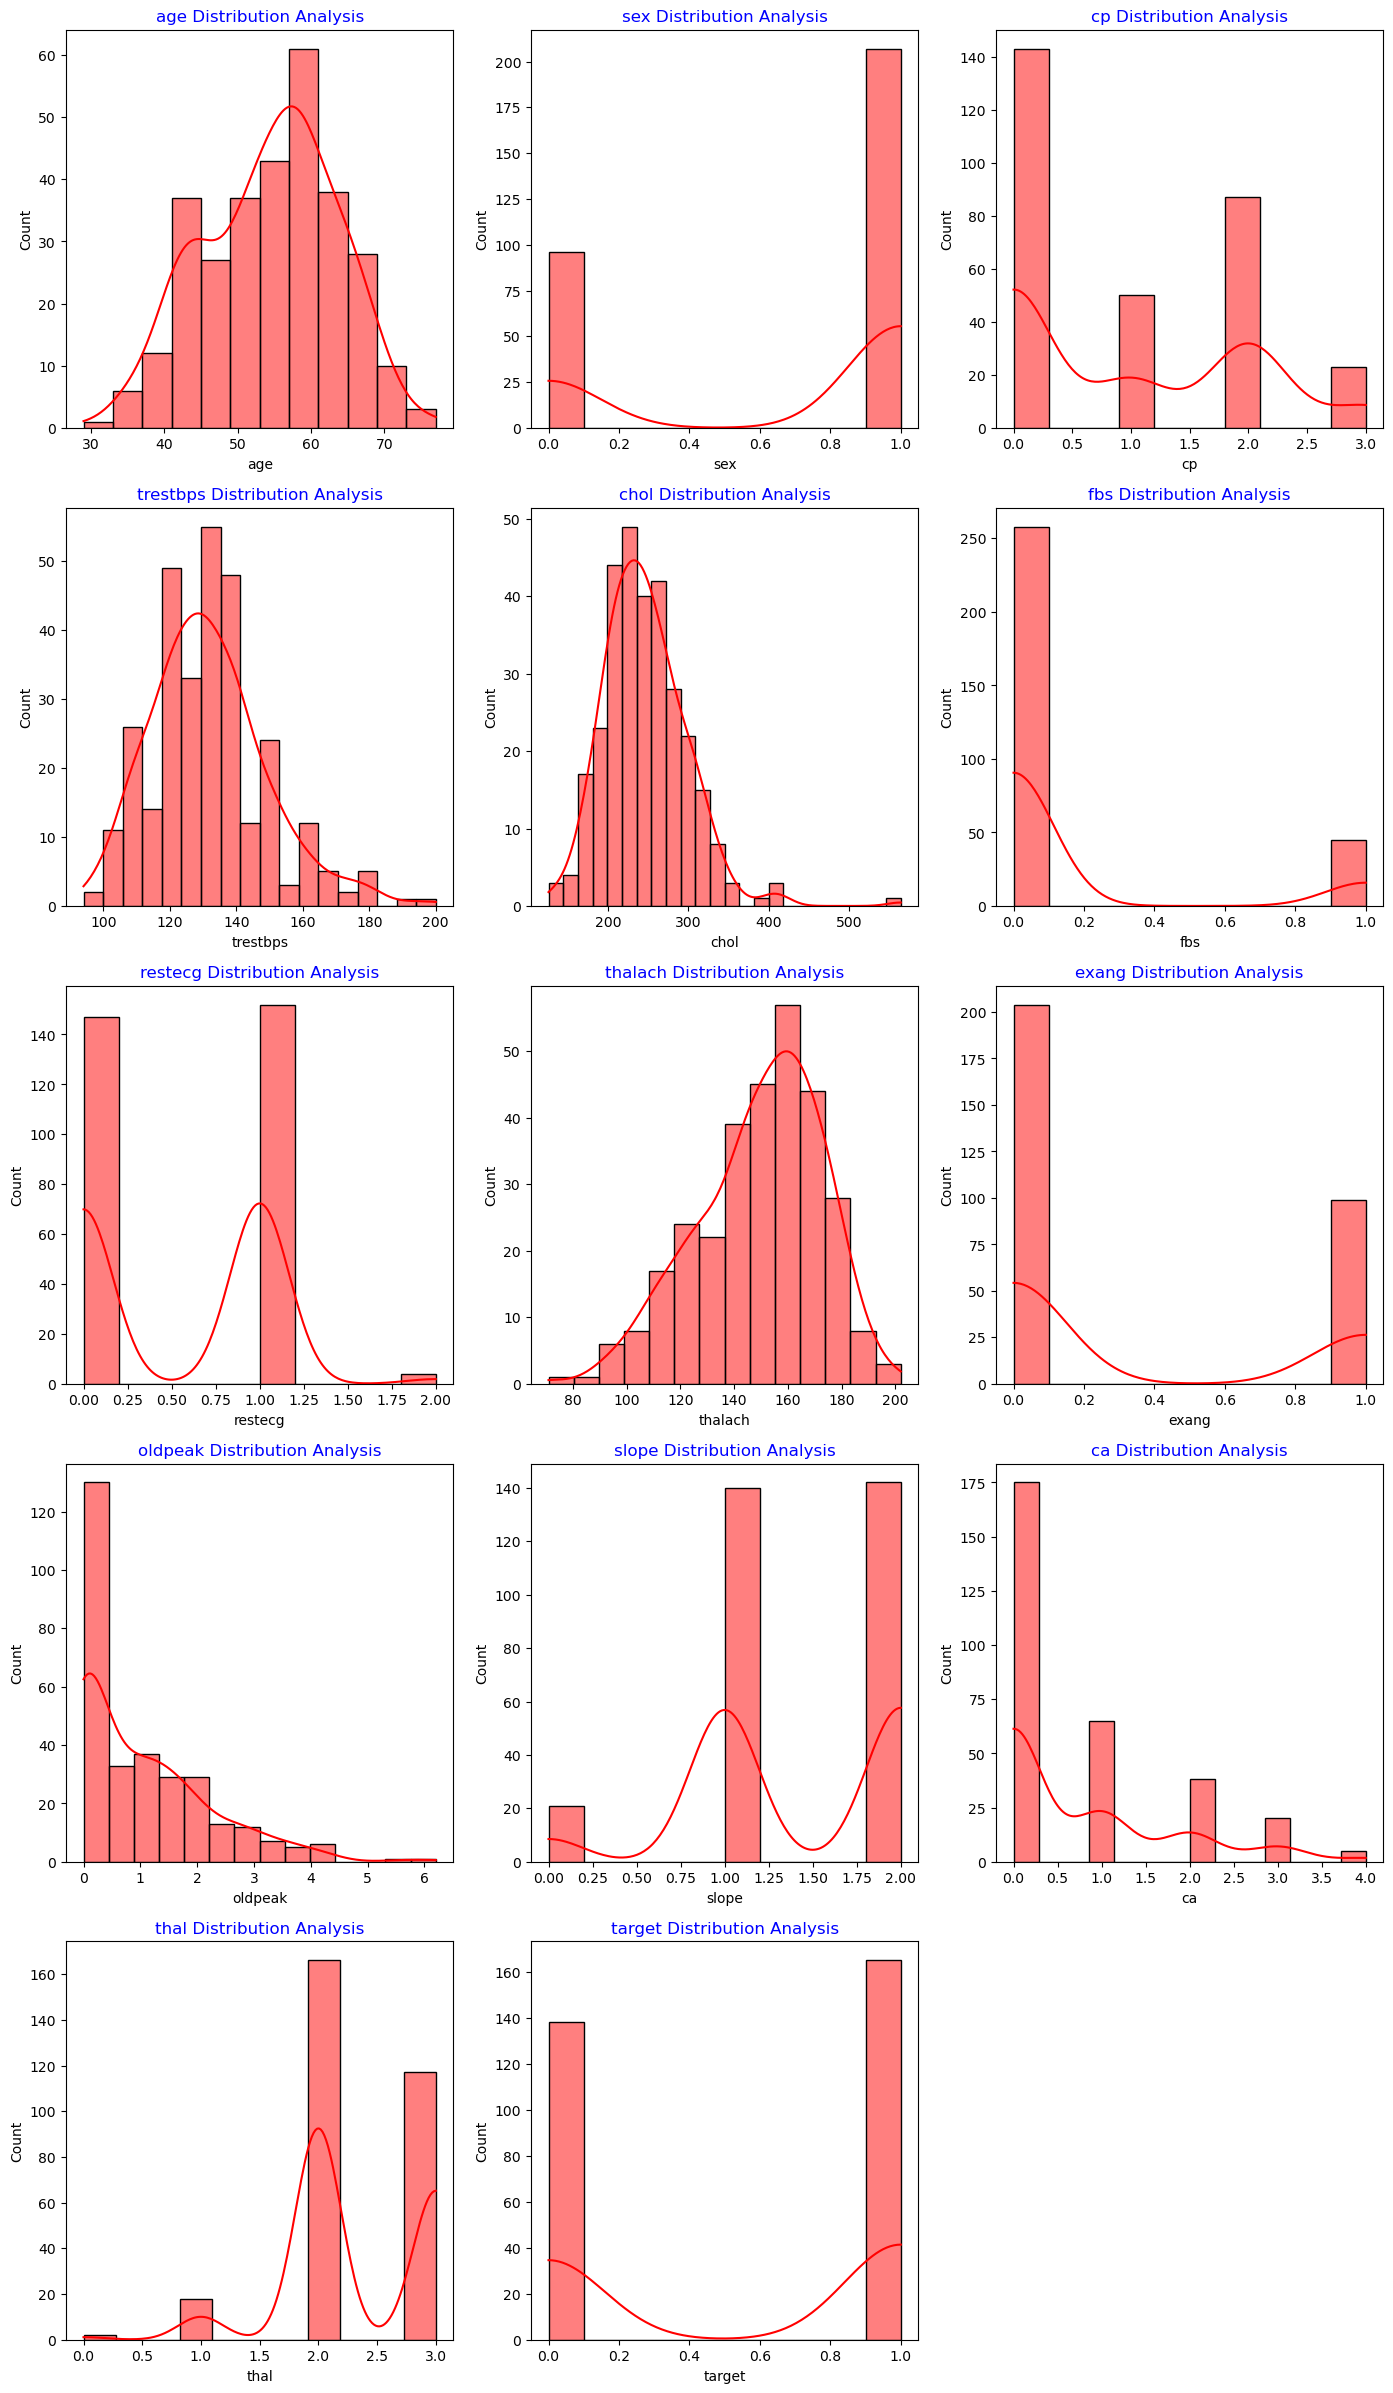

In [12]:
r = 5
c = 3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis',color = 'Blue')
    sns.histplot(df[j],kde = True,color = 'r')

plt.savefig('All Numerical Features Analysis.jpeg',dpi = 500)
plt.show()

### Bivariate Analysis: To check correlation of features v/s target

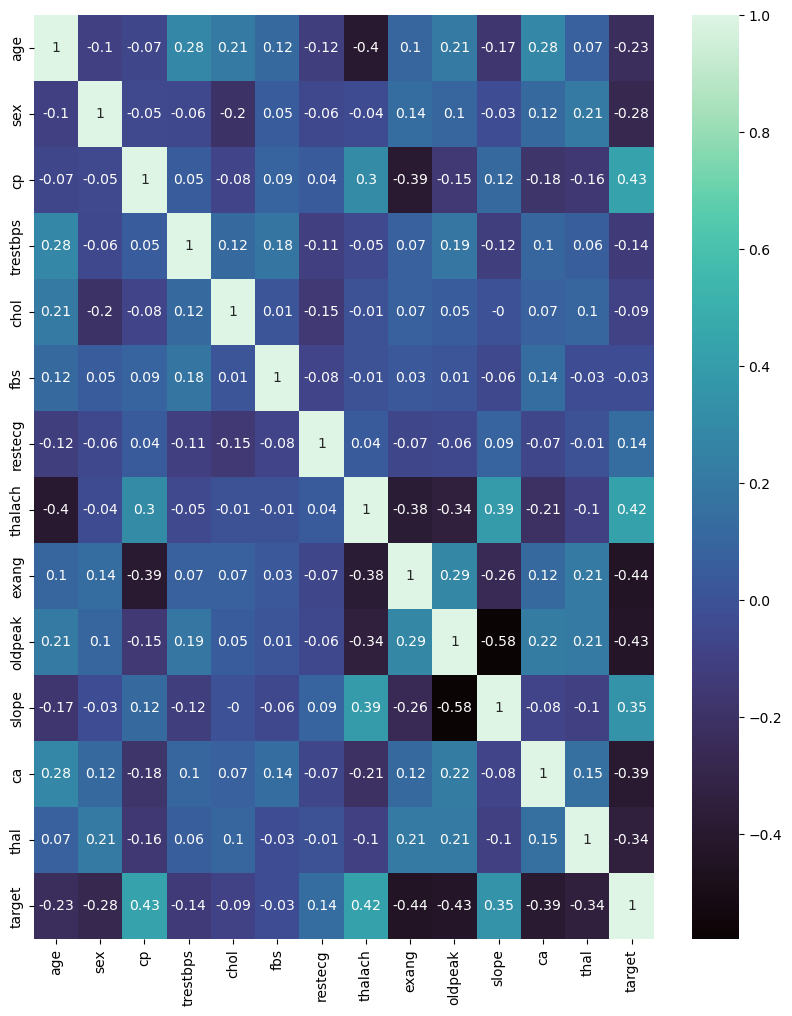

In [13]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr().round(2),cmap='mako',annot = True)
plt.show()

In [14]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)

In [15]:
# Fasting blood sugar (FBS) levels, when elevated, can indicate an increased risk of heart disease

In [16]:
# "slope" usually refers to the ST/HR slope, which is a measurement derived from an exercise stress test used to assess the severity of coronary artery disease

In [17]:
# 3.12: Target vs Features
df.corr()['target'].sort_values(ascending = False).reset_index()


,index,target
0,target,1.000000
1,cp,0.433798
2,thalach,0.421741
3,slope,0.345877
4,restecg,0.137230
5,fbs,-0.028046
6,chol,-0.085239
7,trestbps,-0.144931
8,age,-0.225439
9,sex,-0.280937


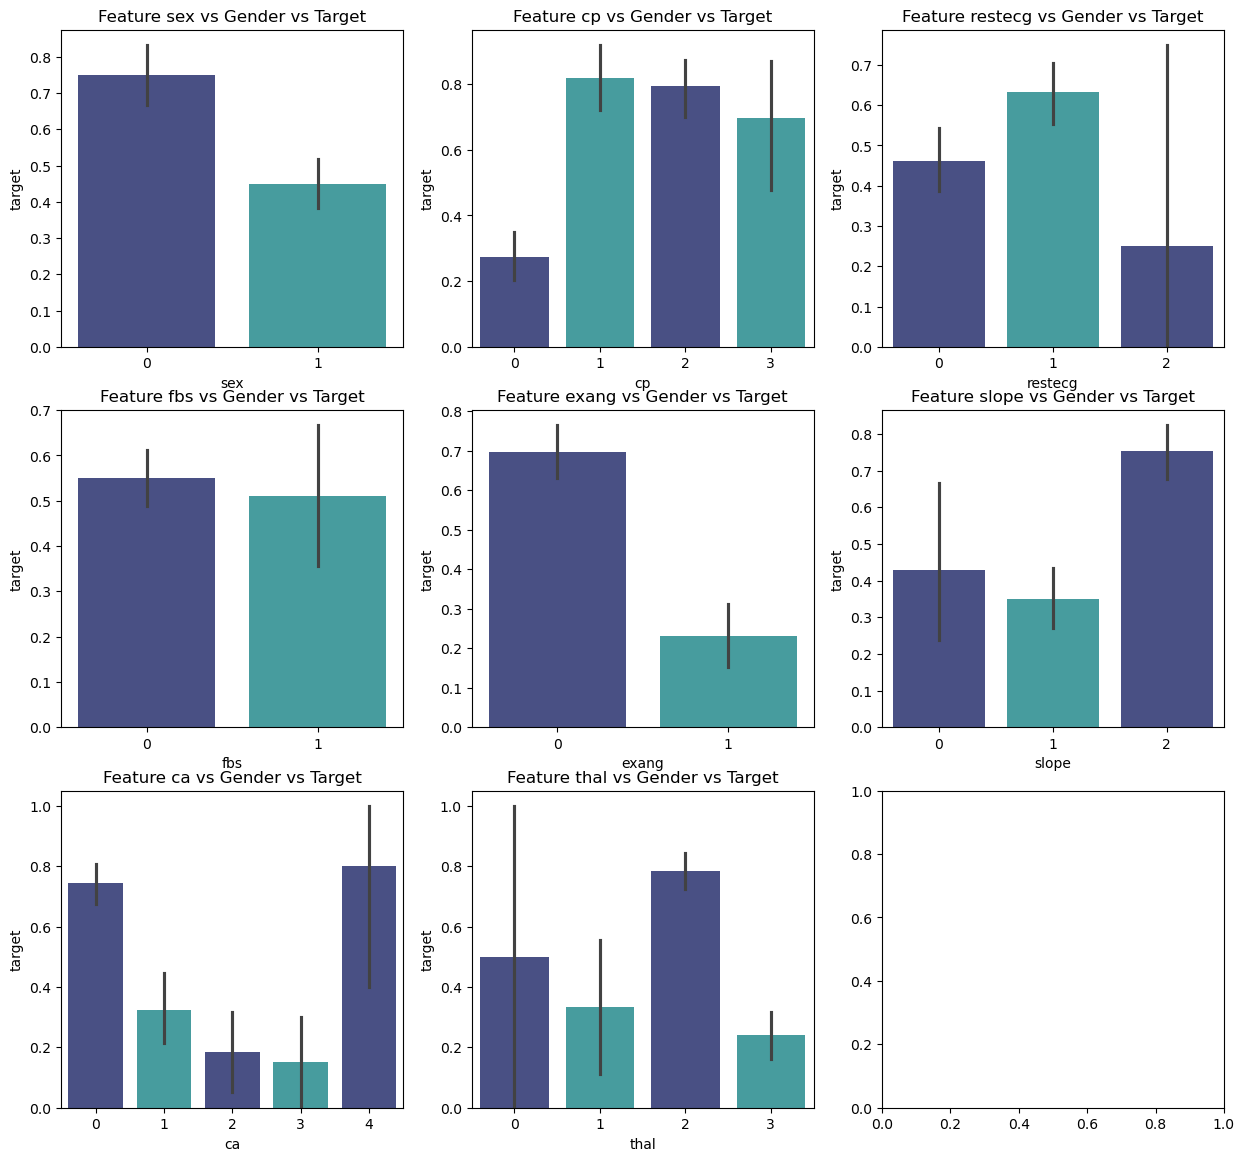

In [18]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
    except:
        ...


plt.show()


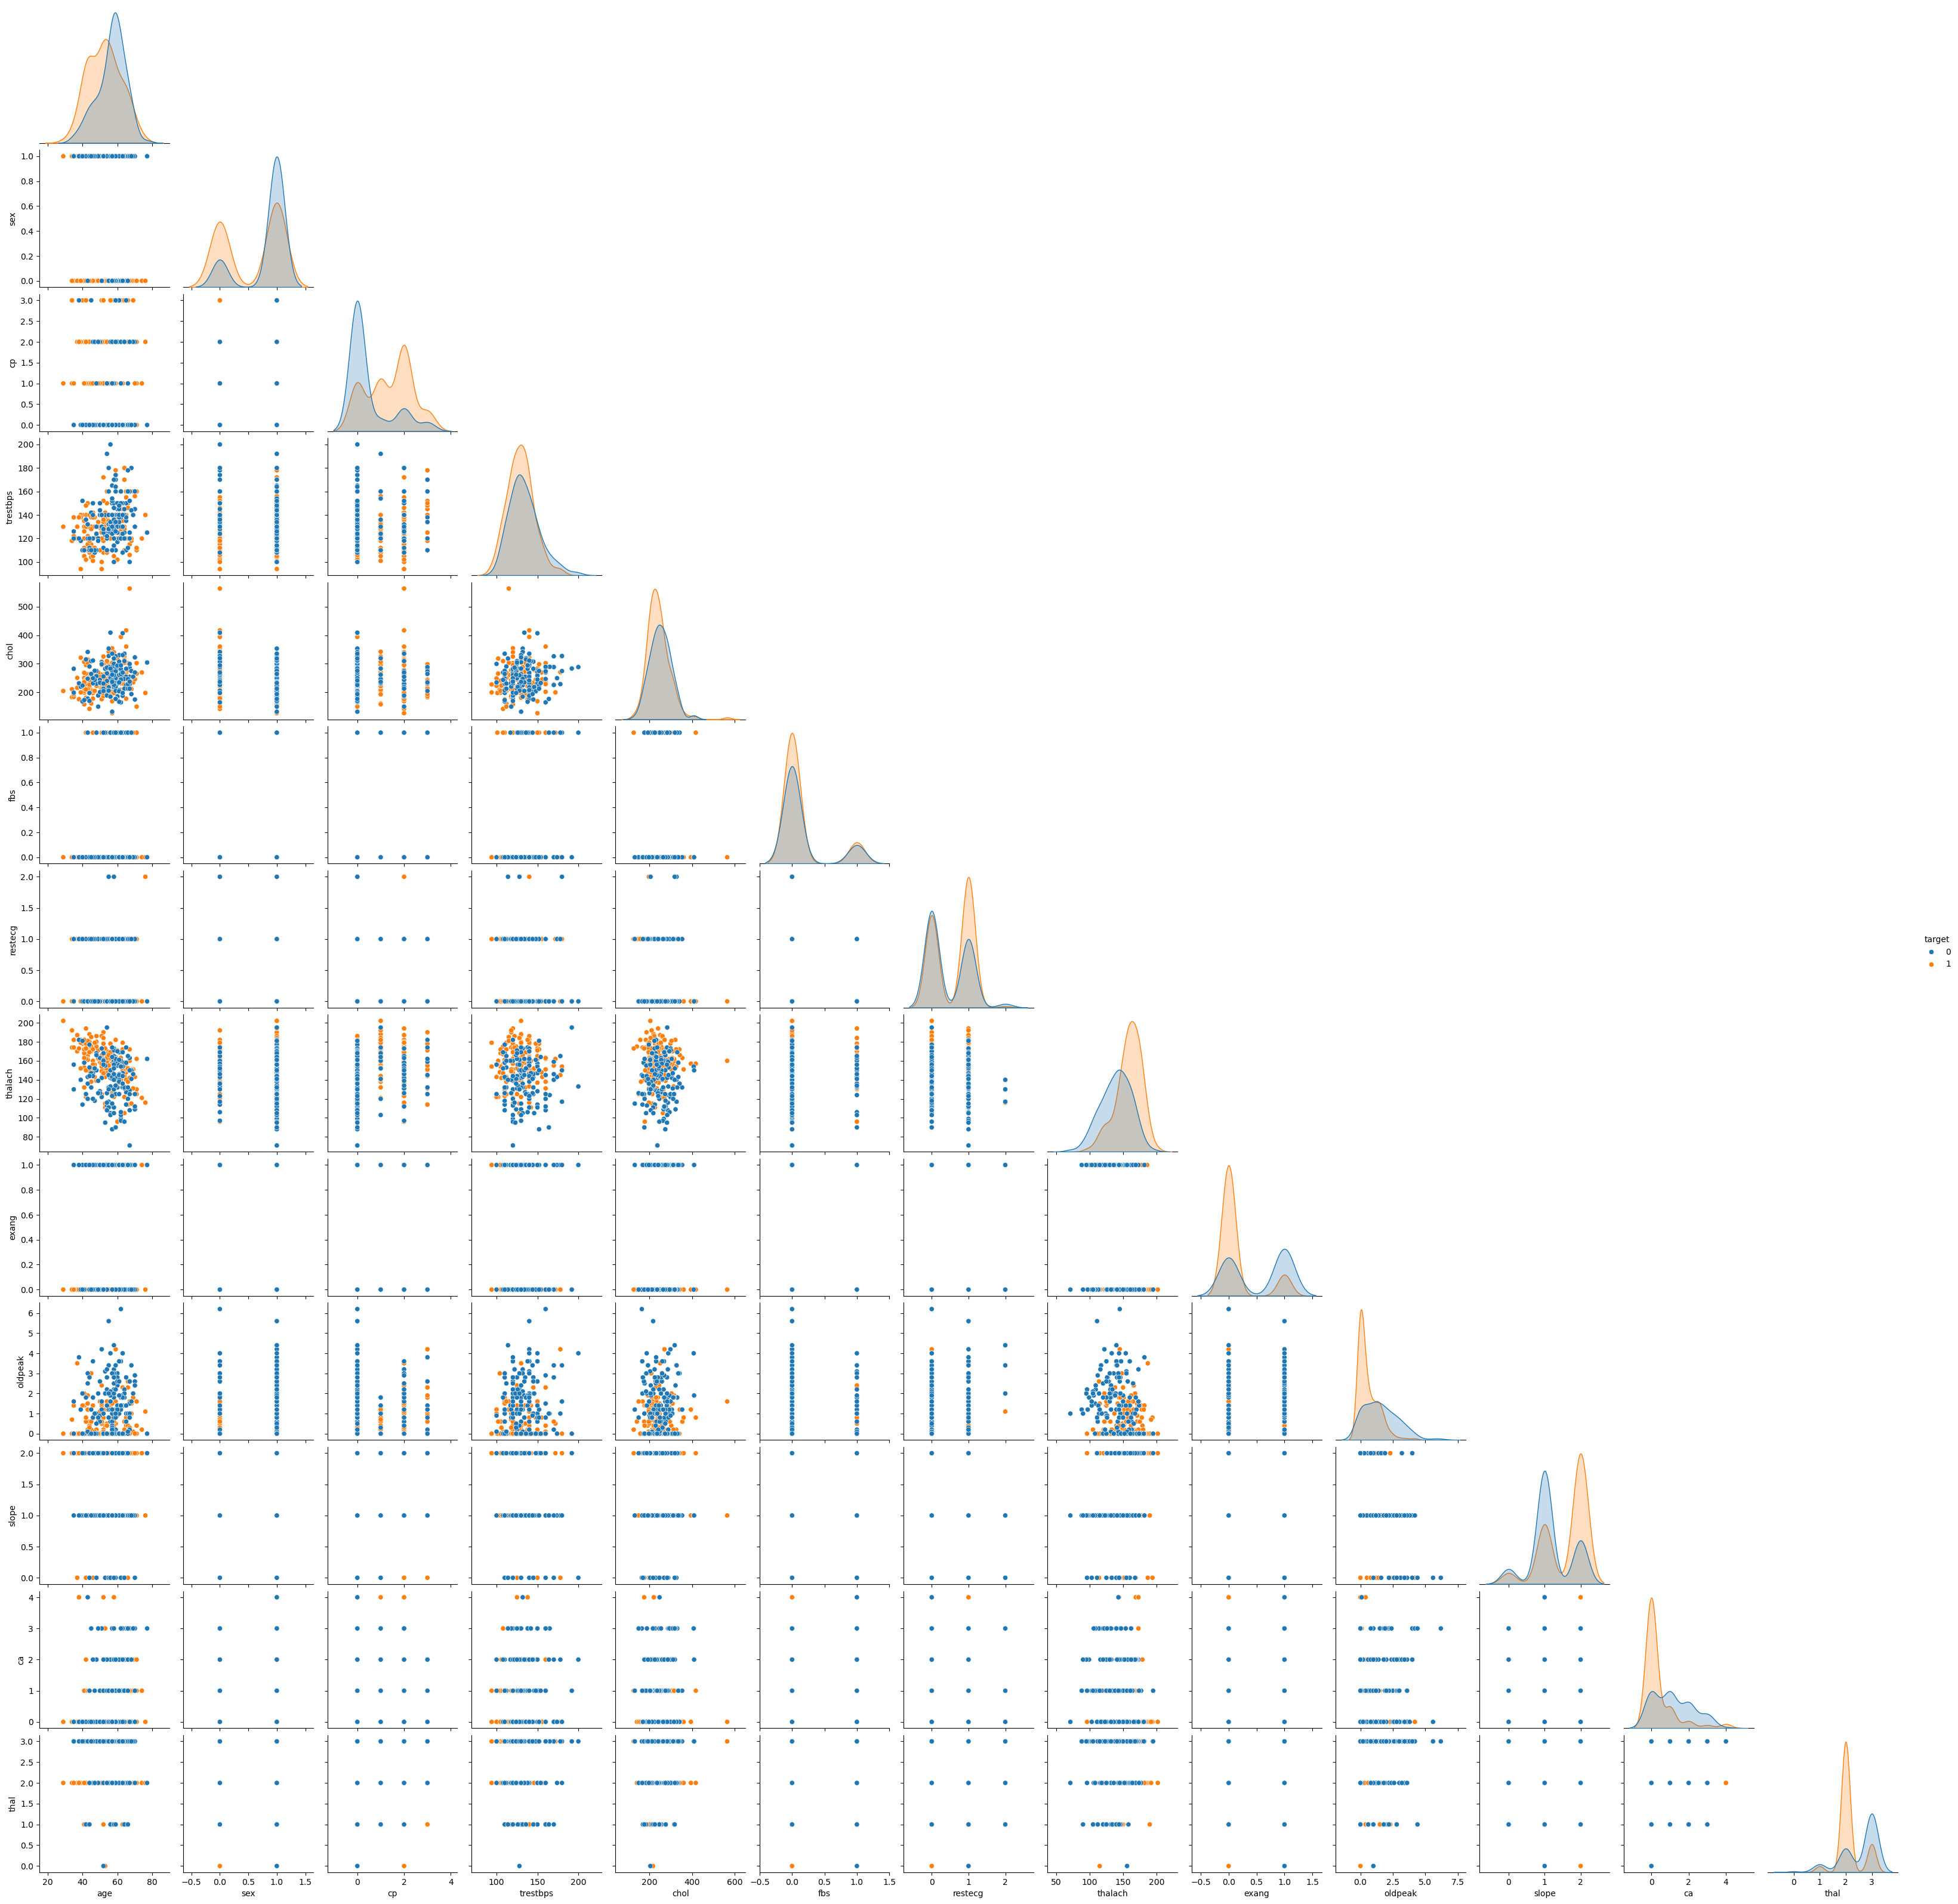

In [19]:
sns.pairplot(data = df, hue = 'target', corner = True)
plt.show()

In [20]:
# 4.1 Divide data into Target and Features

X = df.iloc[:,:-1]
y = df['target']

In [21]:
X.shape, y.shape

((303, 13), (303,))

In [22]:
# 4.2 Train - test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


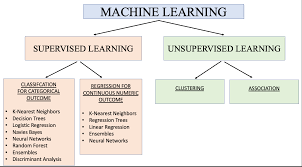

In [24]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train,y_train)

LogisticRegression()

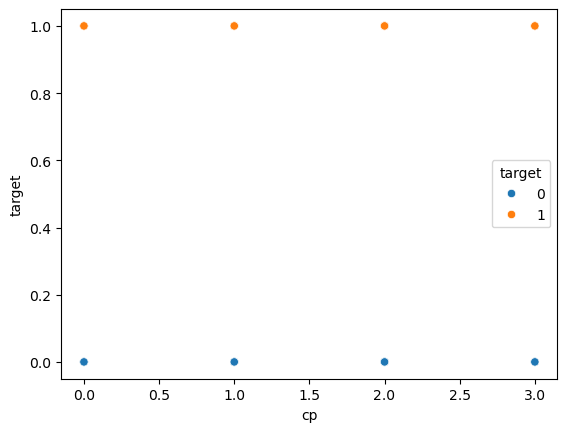

In [25]:
sns.scatterplot(data = df, x = 'cp', y = 'target', hue = 'target')
plt.show()

In [26]:
y_pred = model_lr.predict(X_test)
# y_pred

In [27]:
# 5.1.2: Import model evaluation metrices
# It will be called only when problem is of Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [28]:
# 5.1.2: Import model evaluation metrices
# It will be called only when problem is of Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [29]:
# 5.1.3: Import Confusion Matrix to Evaluate classificationModel
from sklearn.metrics import confusion_matrix

In [30]:
# Error: comparison: if Score tie
# Type1, Type2: Type 1 Error danger ,

In [31]:
cm = confusion_matrix(y_test,y_pred)

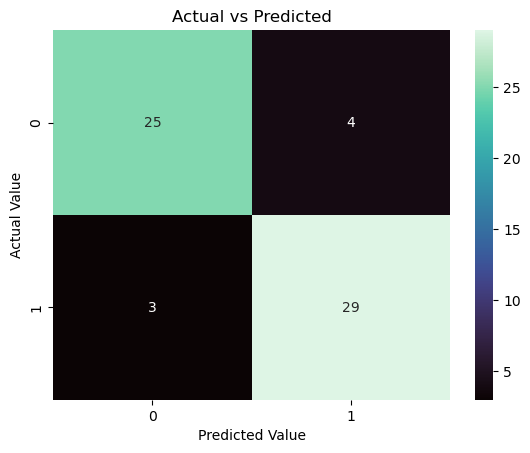

In [32]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [33]:
TN,FP,FN,TP = cm.ravel()

In [34]:
precision_score(y_test,y_pred)

0.8787878787878788

In [35]:
acs = (TN + TP)/cm.sum()
print(acs)

0.8852459016393442


In [36]:
print(accuracy_score(y_test,y_pred))

0.8852459016393442


In [37]:
rs = recall_score(y_test,y_pred)
print('Recall Score is: ',rs)

Recall Score is:  0.90625


In [38]:
f1_sc = f1_score(y_test,y_pred)
f1_sc

0.8923076923076924

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [40]:
#5.1.4: Checking Model Score
# Model Score same as accuracy Score
lr_score = model_lr.score(X_test,y_test)

In [41]:
from sklearn.naive_bayes import GaussianNB
# GaussianNB only be use in case of binary classification
# MultinomialNB: only be use in case of Multi class classification


model_nv = GaussianNB()

model_nv.fit(X_train,y_train)  # Train part/learning


GaussianNB()

In [42]:
nv_score = model_nv.score(X_test,y_test)

In [43]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.8852459016393442
Precision Score:  0.8787878787878788
Recall Score:  0.90625
F1 Score:  0.8923076923076924


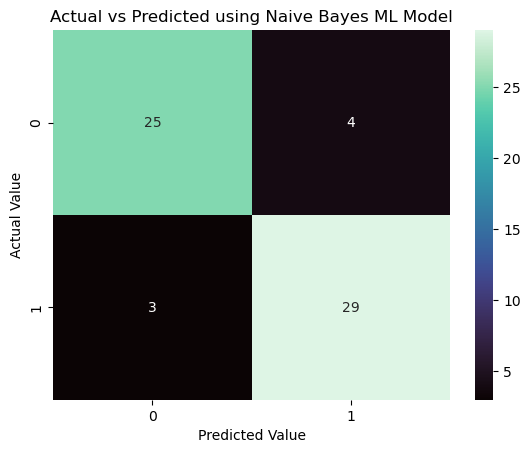

In [44]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Support Victor Machine Ml. Model

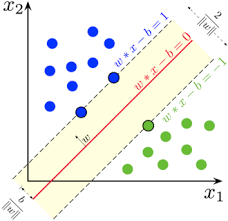  

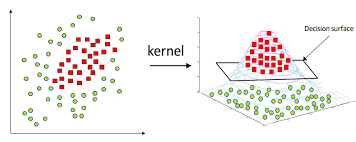

### SVM

In [45]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

In [46]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train,y_train)

SVC()

In [47]:
y_pred = model_svc.predict(X_test)

##### STEP 5.3.3 : Checking Scores and Confusion Matrix

In [48]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.7049180327868853
Precision Score:  0.6666666666666666
Recall Score:  0.875
F1 Score:  0.7567567567567568


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



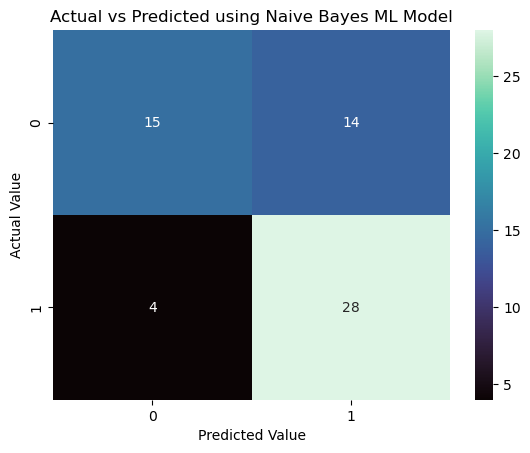

In [50]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()  

In [51]:
svm_score = accuracy_score(y_test,y_pred)

In [52]:
model_svc.score(X_test,y_test)

0.7049180327868853

sepel lenght 
sepel width
petel lenth
petel wisth

iris popular species 
vercicolour
setosa
verginica


### Decision Tree ML Model

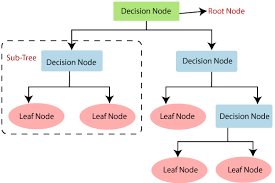

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [55]:
# 5.4.2 Step Predict y_pred

y_pred = model_dt.predict(X_test)

In [56]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.819672131147541
Precision Score:  0.8888888888888888
Recall Score:  0.75
F1 Score:  0.8135593220338984


In [57]:
dt_score = model_dt.score(X_test,y_test)

In [58]:
from sklearn.tree import plot_tree

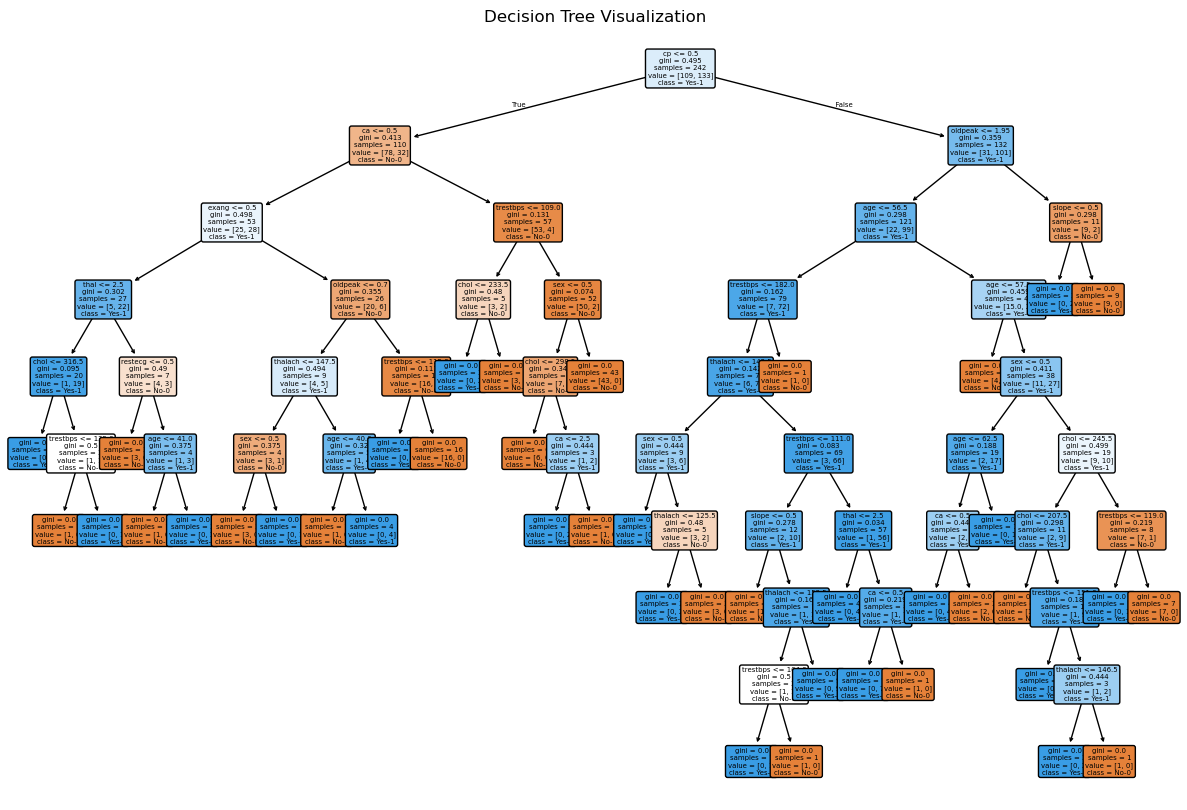

In [59]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

### Step 5.5: Ensemble ML Model
Bagging Technique: Bags of Multiple ML Model, and each model give it's prediction/classification, final outcome based on majority
Boosting Technique: Next model learn from previous model and boost it minimize error to improve score

### Bagging Technique Model: Random Forest Model

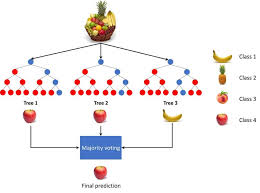

In [60]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 200) # Parameter change Default Tree 100 to 200

model_rf.fit(X_train,y_train)  # Learning

RandomForestClassifier(n_estimators=200)

In [61]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.819672131147541
Precision Score:  0.8888888888888888
Recall Score:  0.75
F1 Score:  0.8135593220338984


In [62]:
rf_score = model_rf.score(X_test,y_test)

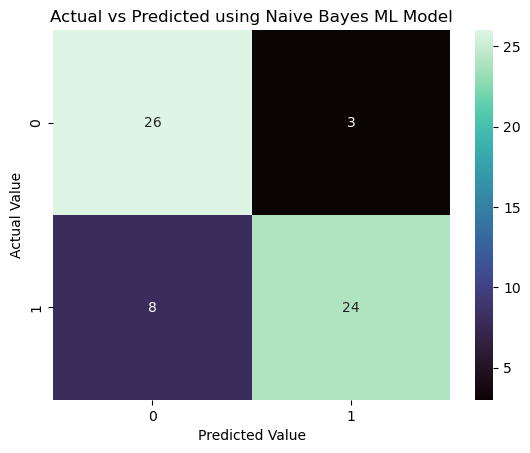

In [63]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()  

### Ensemble Boosting Technique: Adoboost, GradientBoosting, XGboost

. Adaboost: Adaptive Boosting
 .Gradientboost: GBM
 .LBM: Gradientboost: LGBM
 .XGboost: Extreme Gradient Boosting:
 .Catboost: Categorical: textual data:

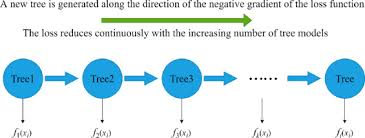

In [64]:
#pip install xgboost

In [65]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [66]:
y_pred = model_xgb.predict(X_test)

In [67]:
xgb_score = accuracy_score(y_test,y_pred)
xgb_score

0.819672131147541

# Import KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

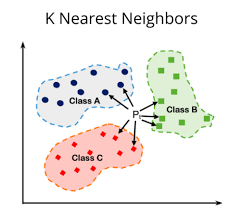

In [69]:
model_knn = KNeighborsClassifier(n_neighbors=14) # k= 14

model_knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=14)

In [70]:
y_pred = model_knn.predict(X_test)

In [71]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



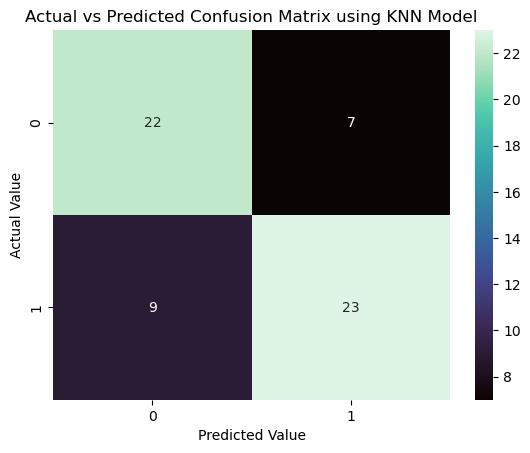

In [73]:
# Step 5.3.4
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted Confusion Matrix using KNN Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Artifical Neural Network using Deep Learning

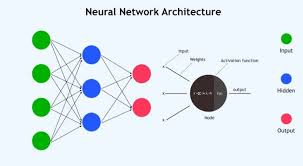

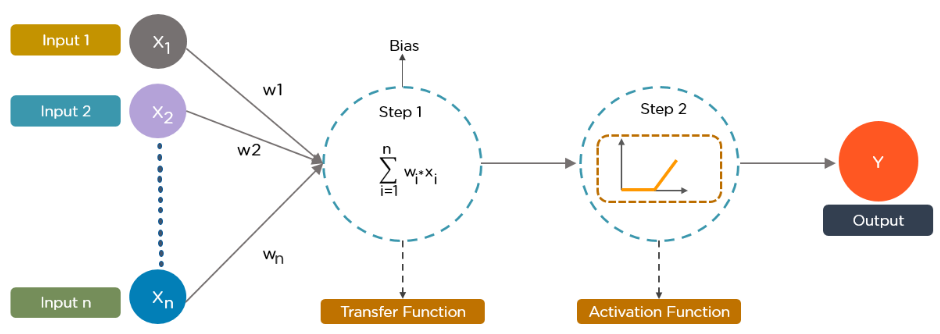

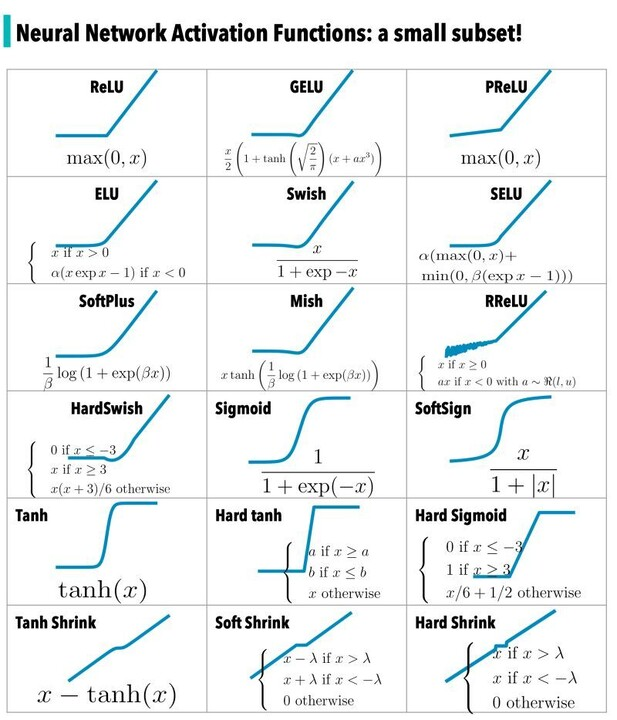

# ANN Model Creation

In [74]:
#pip install keras

In [75]:
#pip install tensorflow 

In [76]:
from keras.models import Sequential
from keras.layers import Dense

In [77]:
model = Sequential()  # Step 1 Sequential model creation
model.add(Dense(11,activation='relu',input_dim=13)) # Dense Layer
model.add(Dense(1,activation='sigmoid')) # Output will be 1 Neuron for Binary

model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

Done


In [78]:
# 5.8.3 Model Training
model.fit(X_train,y_train,epochs=300)  # iteration during retraining: epochs=300

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4504 - loss: 40.2764
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4504 - loss: 34.2978 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4504 - loss: 28.4969 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4545 - loss: 22.9687 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4545 - loss: 17.8720 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3926 - loss: 13.4022 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3967 - loss: 10.1514
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3802 - loss: 8.6354
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3926 - loss: 7.8620 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4050 - loss: 7.6327 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4174 - loss: 7.4591 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.409

In [79]:
# 5.8.4 pred y_value

y_pred = model.predict(X_test)
y_pred  = [round(i[0]) for i in  y_pred]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [80]:
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.8032786885245902

In [81]:
all_model_score  = [lr_score,nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','Knn','ANN']

print('Done')

Done


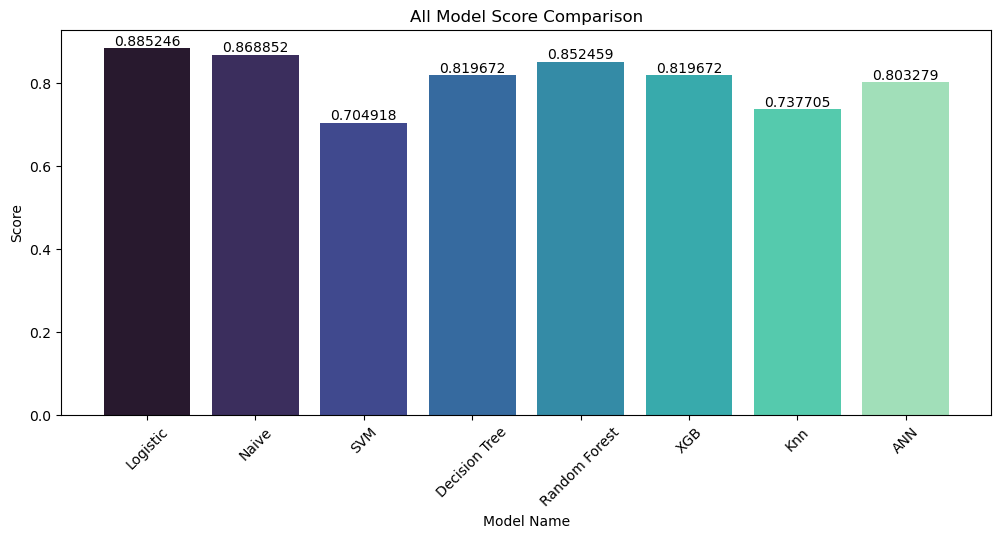

In [82]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

# step 7: save and upload the file

In [83]:
import pickle
with open('heart_disease_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('Done')

Done


In [84]:
import os
os.getcwd()

'C:\\Users\\Aarshi Pundeer\\heart disease prediction model'